# Introduction


## Dataset and motivation:

We will be using the Skims website to gather inventory data of products sold. To gather this data, product inventory, we will have to scrape the following tabs from the Skims website https://skims.com/:

+ Skims Bras - https://skims.com/collections/bras
+ Skims Underwear - https://skims.com/collections/underwear
+ Skims Clothing & Lounge - https://skims.com/collections/clothing / https://skims.com/collections/loungewear
+ Skims Shapewear - https://skims.com/collections/shapewear

From these tabs we were able to scrape metadata that contains the product name, category and collection the product was released under, color, sizes, pricing information, as well as product images. There was additional data that was made available through our scrapes including various options for sorting and filter your product views to what is of most interest to you - including style of clothing, size, color, price (high to low or low to high), as well as the search button. Many of these attributes will not be used within the scope of this project.


## Task definition/research question:

In this project we will be analyzing the various product categories in depth. We will identify which colors, sizes, and products are being sold and what the inventory of these products is currently. For the purposes of this project we will use simulated purchase orders to provide our analysis. With the simulated purchases we can identify popular items that can then be expanded upon, in future analysis, using real world customer data to inform buyers of popular items that are selling out quickly. For the purposes of this assignment customer information, including purchase orders, will be simulated.


## Github Repository

This project does not use outside data sources. All necessary data for this project is contained within this notebook or accessible through our code script. But for the purposes of this assignment you can access our github repository through the following link.

+ https://github.com/tcop3/TOOL1_FINAL_PROJECT

In our github repository you will find this notebook along with a readme that walks through the purpose of this assignment, our task, literature review, and the assumptions that we will be taking into our project (i.e., inventory trends as it relates to sizing).

## Literature review

The exploratory analysis that we conducted is common practice in the merchandise/sales world. But without having access to the backend of a website to collect customer information our analysis, at best, an estimate. What is unique about this project is we can start to see how companies plan inventory and stock products based on sales numbers. But this leaves the question of how social norms play into the inventories and purchase orders of the large retailers. In this day and age size inclusivity is a hotbutton issue as more and more underrepresented groups are reclaiming their space in the world. But how does this play into inventory when a company's sole goal is to make a profit? 

There is a fine balance to understand the number of sales that are made at each size as compared to the inventory that is carried by the company and assess how that influences the selling rates. If a product only has 5 pieces available in a size that is subject to sell out quicker but does that give a true and accurate reading of the demand in the market? Additionally, how does this compare to "standard sizes" (i.e., XS-XL) that may have higher inventory and take longer to sell out? These would truly be the more popular items if you consider all factors but initial reports may give a false impression if you are only looking at time to sell out and not a comprehensive comparison against starting inventory and time listed. 

Within this report there are several resources we referenced when analyzing and visualizing our data to understand the current trends that businesses typically want to review for profitability and inventory. These sources include:

+ https://ieeexplore.ieee.org/document/9154038
+ https://www.netsuite.com/portal/resource/articles/inventory-management/inventory-analysis.shtml
+ https://docs.oracle.com/cd/E26228_01/doc.93/e21560/rvw_inv_anal_rpts.htm#WEAIM351
+ https://en.wikipedia.org/wiki/Skims


# Importing the packages we will need to scrape and manipulate our data

In [1]:
from bs4 import BeautifulSoup as bsoup
import lxml.html
import requests
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import cycle
from matplotlib import gridspec
import datetime
import collections
import random

# Products Data Gathering.

## Scraping the bras page on the Skims website.

We first scraped all of the products listed on the Skims bra page.

In [2]:
s = Service('chromedriver.exe')

bra_driver = webdriver.Chrome(service=s)
bra_driver.get('https://skims.com/collections/bras')

bra_soup = bsoup(bra_driver.page_source, 'lxml')

#print(bra_soup.prettify())

In [3]:
bra_product_images = bra_soup.find_all('img', {'class': re.compile('bg-white pointer*')})


print(bra_product_images)

[<img alt="NAKED SCOOP TANK BRA" class="bg-white pointer-events-none absolute top-0 h-full w-full transform bg-cover bg-center object-contain object-center transition-all duration-100 ease-in-out opacity-1" decoding="async" height="600" id="" loading="lazy" src="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-BRA-BR-TNK-1888-ONX-F.jpg?v=1663621731&amp;width=600&amp;height=600" srcset="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-BRA-BR-TNK-1888-ONX-F.jpg?v=1663621731&amp;width=300 300w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-BRA-BR-TNK-1888-ONX-F.jpg?v=1663621731&amp;width=400 400w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-BRA-BR-TNK-1888-ONX-F.jpg?v=1663621731&amp;width=500 500w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-BRA-BR-TNK-1888-ONX-F.jpg?v=1663621731&amp;width=600 600w" tabindex="-1" width="600"/>, <img alt="NAKED SCOOP TANK BRA" class="bg-white pointer-events-none absolut

## Scraping the underwear page on the Skims website.

We then scraped all of the products listed on the Skims underwear page.

In [4]:
under_driver = webdriver.Chrome(service=s)
under_driver.get('https://skims.com/collections/underwear')

under_soup = bsoup(under_driver.page_source, 'lxml')

#print(under_soup.prettify())

In [5]:
under_product_images = under_soup.find_all('img', {'class': re.compile('bg-white pointer*')})


print(under_product_images)

[<img alt="FITS EVERYBODY THONG | ONYX LAYS FLAT ON A WHITE BACKGROUND" class="bg-white pointer-events-none absolute top-0 h-full w-full transform bg-cover bg-center object-contain object-center transition-all duration-100 ease-in-out opacity-1" decoding="async" height="600" id="" loading="lazy" src="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/PN-THG-0028-ONX-FL.jpg?v=1624298626&amp;width=600&amp;height=600" srcset="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/PN-THG-0028-ONX-FL.jpg?v=1624298626&amp;width=300 300w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/PN-THG-0028-ONX-FL.jpg?v=1624298626&amp;width=400 400w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/PN-THG-0028-ONX-FL.jpg?v=1624298626&amp;width=500 500w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/PN-THG-0028-ONX-FL.jpg?v=1624298626&amp;width=600 600w" tabindex="-1" width="600"/>, <img alt="A MODEL STANDS FACING FORWARD WEARING THE SKIMS FITS EVERYBODY THONG IN

## Scraping the clothing & lounge page on the Skims website.

Next, we scraped all of the products listed on the Skims clothing & loung page. We elected to split these products up so we could categorize them appropriately (clothing or lounge) as there are subpages within the larger "clothing & lounge" tab on the Skims website.

In [6]:
clothing_driver = webdriver.Chrome(service=s)

clothing_driver.get('https://skims.com/collections/clothing')

clothing_soup = bsoup(clothing_driver.page_source, 'lxml')

#print(clothing_soup.prettify())

In [7]:
clothing_product_images = clothing_soup.find_all('img', {'class': re.compile('bg-white pointer*')})


print(clothing_product_images)

[<img alt="SKIMS DISCO PANT " class="bg-white pointer-events-none absolute top-0 h-full w-full transform bg-cover bg-center object-contain object-center transition-all duration-100 ease-in-out opacity-1" decoding="async" height="600" id="" loading="lazy" src="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-PNT-2182-SLV.jpg?v=1666751989&amp;width=600&amp;height=600" srcset="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-PNT-2182-SLV.jpg?v=1666751989&amp;width=300 300w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-PNT-2182-SLV.jpg?v=1666751989&amp;width=400 400w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-PNT-2182-SLV.jpg?v=1666751989&amp;width=500 500w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-PNT-2182-SLV.jpg?v=1666751989&amp;width=600 600w" tabindex="-1" width="600"/>, <img alt="SEE: 2X, 3X, 4X" class="bg-white pointer-ev

In [8]:
lounge_driver = webdriver.Chrome(service=s)

lounge_driver.get('https://skims.com/collections/loungewear')

lounge_soup = bsoup(lounge_driver.page_source, 'lxml')

#print(lounge_soup.prettify())

In [9]:
lounge_product_images = lounge_soup.find_all('img', {'class': re.compile('bg-white pointer*')})


print(lounge_product_images)

[<img alt="SOFT LOUNGE SHIMMER LONG SLIP DRESS LAYS FLAT ON A WHITE BACKGROUND" class="bg-white pointer-events-none absolute top-0 h-full w-full transform bg-cover bg-center object-contain object-center transition-all duration-100 ease-in-out opacity-1" decoding="async" height="600" id="" loading="lazy" src="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-DRS-0596-SON-FR.jpg?v=1667283212&amp;width=600&amp;height=600" srcset="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-DRS-0596-SON-FR.jpg?v=1667283212&amp;width=300 300w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-DRS-0596-SON-FR.jpg?v=1667283212&amp;width=400 400w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-DRS-0596-SON-FR.jpg?v=1667283212&amp;width=500 500w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-LOUNGEWEAR-AP-DRS-0596-SON-FR.jpg?v=1667283212&amp;width=600 600w" tabindex="-1" wid

## Scraping the shapewear page on the Skims website.

And lastly, we scraped all of the products listed on the Skims shapewear page.

In [10]:
shapewear_driver = webdriver.Chrome(service=s)

shapewear_driver.get('https://skims.com/collections/shapewear')

shapewear_soup = bsoup(shapewear_driver.page_source, 'lxml')

#print(shapewear_soup.prettify())

In [11]:
shapewear_product_images = shapewear_soup.find_all('img', {'class': re.compile('bg-white pointer*')})


print(shapewear_product_images)

[<img alt="CORE CONTROL THONG | ONYX LAYS FLAT ON A WHITE BACKGROUND" class="bg-white pointer-events-none absolute top-0 h-full w-full transform bg-cover bg-center object-contain object-center transition-all duration-100 ease-in-out opacity-1" decoding="async" height="600" id="" loading="lazy" src="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-SHAPEWEAR-SH-THG-0108-ONX-FL.jpg?v=1620244942&amp;width=600&amp;height=600" srcset="https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-SHAPEWEAR-SH-THG-0108-ONX-FL.jpg?v=1620244942&amp;width=300 300w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-SHAPEWEAR-SH-THG-0108-ONX-FL.jpg?v=1620244942&amp;width=400 400w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-SHAPEWEAR-SH-THG-0108-ONX-FL.jpg?v=1620244942&amp;width=500 500w, https://cdn.shopify.com/s/files/1/0259/5448/4284/products/SKIMS-SHAPEWEAR-SH-THG-0108-ONX-FL.jpg?v=1620244942&amp;width=600 600w" tabindex="-1" width="600"/>, <im

## Pulling out the product titles from the individual product postings.

In [12]:
bra_product_titles = []
under_product_titles = []
clothing_product_titles = []
lounge_product_titles = []
shapewear_product_titles = []

for bra in bra_product_images:
    product_title=bra["alt"]
    bra_product_titles.append(product_title)

for under in under_product_images:
    product_title=under["alt"]
    under_product_titles.append(product_title)
    
for item in clothing_product_images:
    product_title=item["alt"]
    clothing_product_titles.append(product_title)
    
for piece in lounge_product_images:
    product_title=piece["alt"]
    lounge_product_titles.append(product_title)
    
for garment in shapewear_product_images:
    product_title=garment["alt"]
    shapewear_product_titles.append(product_title)


unique_bra_product_titles = np.unique(bra_product_titles)
unique_under_product_titles = np.unique(under_product_titles)
unique_clothing_product_titles = np.unique(clothing_product_titles)
unique_lounge_product_titles = np.unique(lounge_product_titles)
unique_shapewear_product_titles = np.unique(shapewear_product_titles)


## Creating a list of product titles, a list for product categories for all of the scraped products, and a list for the price of all products.

In [13]:
product_titles = []
category = []
price = []
        
for bra in unique_bra_product_titles:
    product_titles.append(bra)
    category.append("bra")
    price.append(round(random.uniform(44.00, 59.00), 2))

for under in unique_under_product_titles:
    product_titles.append(under)
    category.append("underwear")
    price.append(round(random.uniform(32.00, 46.00), 2))

                 
for item in unique_clothing_product_titles:
    product_titles.append(item)
    category.append("clothing")
    price.append(round(random.uniform(45.00, 101.00), 2))

                 
for piece in unique_lounge_product_titles:
    product_titles.append(piece)
    category.append("loungewear")
    price.append(round(random.uniform(45.00, 101.00), 2))

                 
for garment in unique_shapewear_product_titles:
    product_titles.append(garment)
    category.append("shapewear")
    price.append(round(random.uniform(45.00, 81.00), 2))

                 
#print(price)

### Data cleaning and type conversion activity. Please share anything unusual you faced during this activity.

When we scraped the product postings off of the Skims website there was not a clean cut, singular, attribute or field for the price of the product. They set up the products in a way that there are multiple pricing fields (assuming this is to house alternative pricing for sales and special events). Because of this, we elected to simulate the prices of products given the general trends/price ranges we observed for each category. For example, bras typically range in price from 44 (USD) to 58 (USD). We also wanted to allow for cents, as these are monetary value so we created float quantities rounded to two decimal points.

With the scraped data we were able to identify the product titles using the value entered into "alt". There are duplications of items that were collected through our scraping activities as we are proccessing the images posted on the website. We handled these duplications by taking the unique values in each category's product title list. These unique title's then got added to the master list of all product titles.

## Building our products_df dataframe to house our scraped (and simulated) data.

In [14]:
arrays = [['Mineral', 'Mineral', 'Mineral', 'Mineral', 'Mineral', 'Mineral', 'Mineral', 'Mineral', 'Mineral', 'Mineral', 'Bone', 'Bone', 'Bone', 'Bone', 'Bone', 'Bone', 'Bone', 'Bone', 'Bone', 'Bone', 'Heather Grey', 'Heather Grey', 'Heather Grey', 'Heather Grey', 'Heather Grey', 'Heather Grey', 'Heather Grey', 'Heather Grey', 'Heather Grey', 'Heather Grey', 'Sand', 'Sand', 'Sand', 'Sand', 'Sand', 'Sand', 'Sand', 'Sand', 'Sand', 'Sand', 'Soot', 'Soot', 'Soot', 'Soot', 'Soot', 'Soot', 'Soot', 'Soot', 'Soot', 'Soot', 'Mica', 'Mica', 'Mica', 'Mica', 'Mica', 'Mica', 'Mica', 'Mica', 'Mica', 'Mica', 'Clay', 'Clay', 'Clay', 'Clay', 'Clay', 'Clay', 'Clay', 'Clay', 'Clay', 'Clay', 'Ochre', 'Ochre', 'Ochre', 'Ochre', 'Ochre', 'Ochre', 'Ochre', 'Ochre', 'Ochre', 'Ochre', 'Sienna', 'Sienna', 'Sienna', 'Sienna', 'Sienna', 'Sienna', 'Sienna', 'Sienna', 'Sienna', 'Sienna', 'Umber', 'Umber', 'Umber', 'Umber', 'Umber', 'Umber', 'Umber', 'Umber', 'Umber', 'Umber', 'Oxide', 'Oxide', 'Oxide', 'Oxide', 'Oxide', 'Oxide', 'Oxide', 'Oxide', 'Oxide', 'Oxide', 'Cocoa', 'Cocoa', 'Cocoa', 'Cocoa', 'Cocoa', 'Cocoa', 'Cocoa', 'Cocoa', 'Cocoa', 'Cocoa', 'Onyx', 'Onyx', 'Onyx', 'Onyx', 'Onyx', 'Onyx', 'Onyx', 'Onyx', 'Onyx', 'Onyx'], 
          ['XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL', 'XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL']]

tuples = list(zip(*arrays))


index = pd.MultiIndex.from_tuples(tuples)

products_df = pd.DataFrame(columns=index)


products_df


Empty DataFrame
Columns: [(Mineral, XXS), (Mineral, XS), (Mineral, S), (Mineral, M), (Mineral, L), (Mineral, XL), (Mineral, 2XL), (Mineral, 3XL), (Mineral, 4XL), (Mineral, 5XL), (Bone, XXS), (Bone, XS), (Bone, S), (Bone, M), (Bone, L), (Bone, XL), (Bone, 2XL), (Bone, 3XL), (Bone, 4XL), (Bone, 5XL), (Heather Grey, XXS), (Heather Grey, XS), (Heather Grey, S), (Heather Grey, M), (Heather Grey, L), (Heather Grey, XL), (Heather Grey, 2XL), (Heather Grey, 3XL), (Heather Grey, 4XL), (Heather Grey, 5XL), (Sand, XXS), (Sand, XS), (Sand, S), (Sand, M), (Sand, L), (Sand, XL), (Sand, 2XL), (Sand, 3XL), (Sand, 4XL), (Sand, 5XL), (Soot, XXS), (Soot, XS), (Soot, S), (Soot, M), (Soot, L), (Soot, XL), (Soot, 2XL), (Soot, 3XL), (Soot, 4XL), (Soot, 5XL), (Mica, XXS), (Mica, XS), (Mica, S), (Mica, M), (Mica, L), (Mica, XL), (Mica, 2XL), (Mica, 3XL), (Mica, 4XL), (Mica, 5XL), (Clay, XXS), (Clay, XS), (Clay, S), (Clay, M), (Clay, L), (Clay, XL), (Clay, 2XL), (Clay, 3XL), (Clay, 4XL), (Clay, 5XL), (Ochre, XXS), (Ochre, XS), (Ochre, S), (Ochre, M), (Ochre, L), (Ochre, XL), (Ochre, 2XL), (Ochre, 3XL), (Ochre, 4XL), (Ochre, 5XL), (Sienna, XXS), (Sienna, XS), (Sienna, S), (Sienna, M), (Sienna, L), (Sienna, XL), (Sienna, 2XL), (Sienna, 3XL), (Sienna, 4XL), (Sienna, 5XL), (Umber, XXS), (Umber, XS), (Umber, S), (Umber, M), (Umber, L), (Umber, XL), (Umber, 2XL), (Umber, 3XL), (Umber, 4XL), (Umber, 5XL), ...]
Index: []

[0 rows x 130 columns]

## Adding in our scraped (and simulated) data.

### New feature/attribute creation.

We will now add in features for title, category, and price.

In [15]:
products_df['title'] = product_titles
products_df['category'] = category
products_df['price'] = price

products_df

Mineral                                               ... Onyx            \
        XXS   XS    S    M    L   XL  2XL  3XL  4XL  5XL  ...    M    L   XL   
0       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
..      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
263     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
264     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
265     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
266     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
267     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

                                                                     title  \
     2XL  3XL  4XL  5XL                                                      
0    NaN  NaN  NaN  NaN  A MODEL STANDS FACING FORWARD WEARING THE SKIM...   
1    NaN  NaN  NaN  NaN                         FITS EVERYBODY T-SHIRT BRA   
2    NaN  NaN  NaN  NaN         FITS EVERYBODY T-SHIRT BRA WORN BY A MODEL   
3    NaN  NaN  NaN  NaN  FITS EVERYBODY T-SHIRT PUSH UP BRA WORN BY A M...   
4    NaN  NaN  NaN  NaN  FITS EVERYBODY T-SHIRT PUSH UP BRA | ONYX LAYS...   
..   ...  ...  ...  ...                                                ...   
263  NaN  NaN  NaN  NaN  SKIRT SLIP | ONYX LAYS FLAT ON A WHITE BACKGROUND   
264  NaN  NaN  NaN  NaN  SOLUTION SHORT #1 | ONYX LAYS FLAT ON A WHITE ...   
265  NaN  NaN  NaN  NaN  SOLUTION SHORT #2 | ONYX LAYS FLAT ON A WHITE ...   
266  NaN  NaN  NaN  NaN  WAIST TRAINER | CLAY LAYS FLAT ON A WHITE BACK...   
267  NaN  NaN  NaN  NaN  WAIST TRAINER | ONYX LAYS FLAT ON A WHITE BACK...   

      category  price  
                       
0          bra  53.12  
1          bra  50.86  
2          bra  57.62  
3          bra  45.02  
4          bra  53.49  
..         ...    ...  
263  shapewear  50.49  
264  shapewear  73.38  
265  shapewear  73.36  
266  shapewear  57.65  
267  shapewear  56.06  

[268 rows x 133 columns]

In [16]:
cols = products_df.columns.tolist()
cols = cols[:130]

print(cols)

[('Mineral', 'XXS'), ('Mineral', 'XS'), ('Mineral', 'S'), ('Mineral', 'M'), ('Mineral', 'L'), ('Mineral', 'XL'), ('Mineral', '2XL'), ('Mineral', '3XL'), ('Mineral', '4XL'), ('Mineral', '5XL'), ('Bone', 'XXS'), ('Bone', 'XS'), ('Bone', 'S'), ('Bone', 'M'), ('Bone', 'L'), ('Bone', 'XL'), ('Bone', '2XL'), ('Bone', '3XL'), ('Bone', '4XL'), ('Bone', '5XL'), ('Heather Grey', 'XXS'), ('Heather Grey', 'XS'), ('Heather Grey', 'S'), ('Heather Grey', 'M'), ('Heather Grey', 'L'), ('Heather Grey', 'XL'), ('Heather Grey', '2XL'), ('Heather Grey', '3XL'), ('Heather Grey', '4XL'), ('Heather Grey', '5XL'), ('Sand', 'XXS'), ('Sand', 'XS'), ('Sand', 'S'), ('Sand', 'M'), ('Sand', 'L'), ('Sand', 'XL'), ('Sand', '2XL'), ('Sand', '3XL'), ('Sand', '4XL'), ('Sand', '5XL'), ('Soot', 'XXS'), ('Soot', 'XS'), ('Soot', 'S'), ('Soot', 'M'), ('Soot', 'L'), ('Soot', 'XL'), ('Soot', '2XL'), ('Soot', '3XL'), ('Soot', '4XL'), ('Soot', '5XL'), ('Mica', 'XXS'), ('Mica', 'XS'), ('Mica', 'S'), ('Mica', 'M'), ('Mica', 'L'), (

In [17]:
cols = products_df.columns.tolist()
cols = cols[:130]

for column in cols:
    if 'XXS' in column:
        products_df[column] = np.random.randint(1, 751)
    elif '2XL' in column:
        products_df[column] = np.random.randint(1, 251)
    elif '3XL' in column:
        products_df[column] = np.random.randint(1, 201)
    elif '4XL' in column:
        products_df[column] = np.random.randint(1, 101)
    elif '5XL' in column:
        products_df[column] = np.random.randint(1, 51)
    elif 'XS' in column:
        products_df[column] = np.random.randint(1, 901)
    elif 'XL' in column:
        products_df[column] = np.random.randint(1, 901)
    else:
        products_df[column] = np.random.randint(1, 1001)

products_df

Mineral                                          ... Onyx                \
        XXS   XS   S    M   L   XL  2XL 3XL 4XL 5XL  ...    M    L   XL 2XL   
0       231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
1       231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
2       231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
3       231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
4       231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
..      ...  ...  ..  ...  ..  ...  ...  ..  ..  ..  ...  ...  ...  ...  ..   
263     231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
264     231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
265     231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
266     231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   
267     231  471  44  611  12  498  249  44  68  10  ...  256  675  338   7   

                                                              title  \
     3XL 4XL 5XL                                                      
0    178   4  18  A MODEL STANDS FACING FORWARD WEARING THE SKIM...   
1    178   4  18                         FITS EVERYBODY T-SHIRT BRA   
2    178   4  18         FITS EVERYBODY T-SHIRT BRA WORN BY A MODEL   
3    178   4  18  FITS EVERYBODY T-SHIRT PUSH UP BRA WORN BY A M...   
4    178   4  18  FITS EVERYBODY T-SHIRT PUSH UP BRA | ONYX LAYS...   
..   ...  ..  ..                                                ...   
263  178   4  18  SKIRT SLIP | ONYX LAYS FLAT ON A WHITE BACKGROUND   
264  178   4  18  SOLUTION SHORT #1 | ONYX LAYS FLAT ON A WHITE ...   
265  178   4  18  SOLUTION SHORT #2 | ONYX LAYS FLAT ON A WHITE ...   
266  178   4  18  WAIST TRAINER | CLAY LAYS FLAT ON A WHITE BACK...   
267  178   4  18  WAIST TRAINER | ONYX LAYS FLAT ON A WHITE BACK...   

      category  price  
                       
0          bra  53.12  
1          bra  50.86  
2          bra  57.62  
3          bra  45.02  
4          bra  53.49  
..         ...    ...  
263  shapewear  50.49  
264  shapewear  73.38  
265  shapewear  73.36  
266  shapewear  57.65  
267  shapewear  56.06  

[268 rows x 133 columns]

### What did you do about missing values and why? Handling missing values properly is very important.

We handled missing data differently throughout this project but looking specifically at the code above where we add in the inventory (quantity of available pieces) for each product that is sold, we did this through for loops to generate integers - note: the data will change each time the code is run. We implemented some logic and assumptions (using industry standards) for how companies typically stock their merchandise. After an initial release, they assess the popularity of items and restock (order additional shipments) based on the popularity of specific sizes and colors. Since we do not know which colors are the most popular on the Skims site, we elected to focus on sizes. This may not be universal, but typically companies carry larger inventory of "standard sized" clothing items (think XS-XL, with XS and XL usually carrying a slightly smaller number). As you can see the Skims site carries extended sizes in their merchandise, which is great for inclusivity but most of the time these sizes (XXS and 2XL-5XL) are not ordered in the same quantity by the brand. Because of this we capped the quantity allotments for the sizes that extend beyond "standard sizing". 

We also similuated data for product prices, explanation can be found above, and customer purchase orders, explanation can be found below.

## Cleaning our products dataframe.

We want to reorder our dataframe so the product title appears first then the inventory numbers for each color and size follow in subsequent columns.

In [18]:
cols = products_df.columns.tolist()

cols = cols[-3:] + cols[:-3]

products_df = products_df[cols]


products_df

title   category  price  \
                                                                           
0    A MODEL STANDS FACING FORWARD WEARING THE SKIM...        bra  53.12   
1                           FITS EVERYBODY T-SHIRT BRA        bra  50.86   
2           FITS EVERYBODY T-SHIRT BRA WORN BY A MODEL        bra  57.62   
3    FITS EVERYBODY T-SHIRT PUSH UP BRA WORN BY A M...        bra  45.02   
4    FITS EVERYBODY T-SHIRT PUSH UP BRA | ONYX LAYS...        bra  53.49   
..                                                 ...        ...    ...   
263  SKIRT SLIP | ONYX LAYS FLAT ON A WHITE BACKGROUND  shapewear  50.49   
264  SOLUTION SHORT #1 | ONYX LAYS FLAT ON A WHITE ...  shapewear  73.38   
265  SOLUTION SHORT #2 | ONYX LAYS FLAT ON A WHITE ...  shapewear  73.36   
266  WAIST TRAINER | CLAY LAYS FLAT ON A WHITE BACK...  shapewear  57.65   
267  WAIST TRAINER | ONYX LAYS FLAT ON A WHITE BACK...  shapewear  56.06   

    Mineral                              ... Onyx                              \
        XXS   XS   S    M   L   XL  2XL  ...  XXS  XS    S    M    L   XL 2XL   
0       231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
1       231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
2       231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
3       231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
4       231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
..      ...  ...  ..  ...  ..  ...  ...  ...  ...  ..  ...  ...  ...  ...  ..   
263     231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
264     231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
265     231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
266     231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   
267     231  471  44  611  12  498  249  ...  358  68  757  256  675  338   7   

                  
     3XL 4XL 5XL  
0    178   4  18  
1    178   4  18  
2    178   4  18  
3    178   4  18  
4    178   4  18  
..   ...  ..  ..  
263  178   4  18  
264  178   4  18  
265  178   4  18  
266  178   4  18  
267  178   4  18  

[268 rows x 133 columns]

### Data cleaning and type conversion activity. Please share anything unusual you faced during this activity.

We further cleaned our data and dataframe by reordering our columns so the product title was the first column as that is typically how items can be identified (unless you are using a product ID or key of some kind). Additionally, as you can see below, we eliminated rows in our dataframe that contained specific phrases and keywords in the product title. These phrases include: 'A MODEL', 'LAYS FLAT', 'A model', and 'XXS'. This is because there were multiple images posted for our products and one of these four phrases was used in the duplicate posting - remember we are using the image data to collect the products sold on this website. This helps us see just the unique products that are listed on the Skims website not all images of products that are available to view on the website. We have trimmed our dataframe from 268 rows to 71 rows indicating we had quite a few duplicate postings!

In [19]:
products_df = products_df[~products_df.title.str.contains('A MODEL', na=False)]
products_df = products_df[~products_df.title.str.contains('LAYS FLAT', na=False)]
products_df = products_df[~products_df.title.str.contains('A model', na=False)]
products_df = products_df[~products_df.title.str.contains('XXS', na=False)]
products_df = products_df[~products_df.title.str.contains('See:', na=False)]
products_df = products_df[~products_df.title.str.contains('Onyx', na=False)]
products_df = products_df[~products_df.title.str.contains('ONYX', na=False)]

products_df

title   category  price Mineral       \
                                                                   XXS   XS   
1                 FITS EVERYBODY T-SHIRT BRA        bra  50.86     231  471   
5       FITS EVERYBODY UNLINED UNDERWIRE BRA        bra  50.59     231  471   
7                           NAKED PLUNGE BRA        bra  51.36     231  471   
8                      NAKED PLUNGE TANK BRA        bra  50.04     231  471   
9                            NAKED SCOOP BRA        bra  45.43     231  471   
..                                       ...        ...    ...     ...  ...   
257            SHEER SCULPT HIGH WAIST THONG  shapewear  63.46     231  471   
259  SHINE SHAPEWEAR BODYSUIT BRIEF W/ SNAPS  shapewear  55.02     231  471   
260                  SHINE SHAPEWEAR LEGGING  shapewear  52.82     231  471   
261           SHINE SHAPEWEAR LOW BACK SHORT  shapewear  48.95     231  471   
262          SHINE SHAPEWEAR MID THIGH SHORT  shapewear  49.97     231  471   

                            ... Onyx                                           
      S    M   L   XL  2XL  ...  XXS  XS    S    M    L   XL 2XL  3XL 4XL 5XL  
1    44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
5    44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
7    44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
8    44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
9    44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
..   ..  ...  ..  ...  ...  ...  ...  ..  ...  ...  ...  ...  ..  ...  ..  ..  
257  44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
259  44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
260  44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
261  44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
262  44  611  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  

[71 rows x 133 columns]

## Updating the price column data type to int so all sales are whole numbers.

In [36]:
products_df.dtypes


title             object
category          object
price            float64
Mineral   XXS      int64
          XS       int64
                  ...   
Onyx      XL       int64
          2XL      int64
          3XL      int64
          4XL      int64
          5XL      int64
Length: 133, dtype: object

### Data cleaning and type conversion activity. Please share anything unusual you faced during this activity.

You may notice that the prices are rounded (to the nearest whole number) on the Skims website, because of this we converted the price column from a float datatype to an integer datatype to be more in alignment with the Skims website and pricing structure.

In [20]:
products_df['price'] = products_df.price.round().astype(int)

products_df.dtypes

title            object
category         object
price             int64
Mineral   XXS     int64
          XS      int64
                  ...  
Onyx      XL      int64
          2XL     int64
          3XL     int64
          4XL     int64
          5XL     int64
Length: 133, dtype: object

In [21]:
products_df.head()

title category price Mineral                \
                                                           XXS   XS   S    M   
1            FITS EVERYBODY T-SHIRT BRA      bra    51     231  471  44  611   
5  FITS EVERYBODY UNLINED UNDERWIRE BRA      bra    51     231  471  44  611   
7                      NAKED PLUNGE BRA      bra    51     231  471  44  611   
8                 NAKED PLUNGE TANK BRA      bra    50     231  471  44  611   
9                       NAKED SCOOP BRA      bra    45     231  471  44  611   

                 ... Onyx                                           
    L   XL  2XL  ...  XXS  XS    S    M    L   XL 2XL  3XL 4XL 5XL  
1  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
5  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
7  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
8  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  
9  12  498  249  ...  358  68  757  256  675  338   7  178   4  18  

[5 rows x 133 columns]

# Visualizing our inventory trends.

In [39]:
colors = ['Mineral', 'Bone', 'Heather Grey','Sand', 'Soot', 'Mica', 'Clay', 'Ochre', 'Sienna', 'Umber', 'Oxide', 'Cocoa', 'Onyx']
sizes = ['XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL']

## Plotting the count of products in each category.

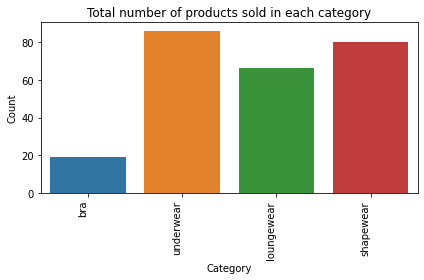

In [40]:
ax = sns.countplot(x=category)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title(f'Total number of products sold in each category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()   

### Describe anything you find in the data after each visualization.

As seen in the countplot above, Skims currently sells more products in the underwear and shapewear categories than any other on the website. Additionally loungewear is also a popular product category.

### What data visualization helped you understand about data distribution.

This visualization helps us target the categories that are seemingly most popular because they have the most products offered. Within shapewear this would make sense as the first products launched by Skims were shapewear products. These continue to be the bread and butter of their business model. It can also show us where their product development is focused as there is a steep dropoff in count quantities for both bra and clothing products, this would indicate to me that they do not currently sell a high quantity of these products so they are not releasing new products in these categories very often (i.e., not a justifiable return on investment to support product development, currently). 

### Describe anything you find in the data after each visualization.

As seen in the countplot above, Skims currently sells more products in the underwear and shapewear categories than any other on the website. Additionally loungewear is also a popular product category.

### What data visualization helped you understand about data distribution.

This visualization helps us target the categories that are seemingly most popular because they have the most products offered. Within shapewear this would make sense as the first products launched by Skims were shapewear products. These continue to be the bread and butter of their business model. It can also show us where their product development is focused as there is a steep dropoff in count quantities for both bra and clothing products, this would indicate to me that they do not currently sell a high quantity of these products so they are not releasing new products in these categories very often (i.e., not a justifiable return on investment to support product development, currently). 

## Plotting the average inventory of Mineral colored products sold in each size across all categories.

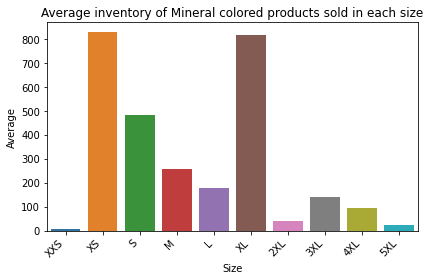

In [41]:
mineral_products_means_quantity = products_df['Mineral'].mean()

ax = sns.barplot(x=sizes, y=mineral_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average inventory of Mineral colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

It is interesting that XS and XL are highest for products sold for the color mineral. We would expect for majority of products sold to fall somewhere between S-XL which is what we're seeing - but such a high concentration on the tail ends of this range is unexpected

### What data visualization helped you understand about data distribution.

The value for XS is skewing our data slightly to the left more than expected but somewhat evens out with the high product inventory being moved within XL. This should be flagged for the client (Skims) to review, as this graph may reflect a recent restock of that size and color.

## Plotting the average inventory of Bone colored products sold in each size across all categories.

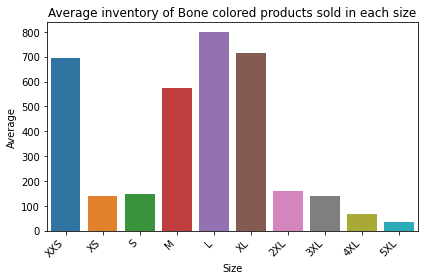

In [42]:
bone_products_means_quantity = products_df['Bone'].mean()

ax = sns.barplot(x=sizes, y=bone_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average inventory of Bone colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

I would not expect to see such a steep decline in the average inventory of Bone colored products on the Skims website for extended sizes of 2XL and up in this color. This is something I would flag for the client as this graph could indicate a restock of standard sizes in this color but also indicate that Skims should consider abbreviating the size range in this color across their products as the low inventory for the extended sizes indicates that the products are not selling quickly. This may be a cost saving opportunity.


### What data visualization helped you understand about data distribution.

The data is heavily skewed to the left, this indicates to me that this is a very popular color amogst "standard sizes" and justifies higher quantities of inventory.

## Plotting the average inventory of Heather Grey colored products sold in each size across all categories.

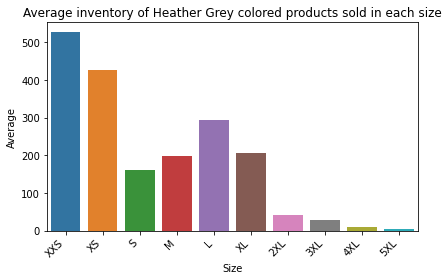

In [43]:
heathergrey_products_means_quantity = products_df['Heather Grey'].mean()

ax = sns.barplot(x=sizes, y=heathergrey_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average inventory of Heather Grey colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

I am surprised at the average inventory of XXS & XS items available for sale on the Skims website in Heather Grey as this would be an assumed popular color as it is a standard within the industry. This would lead me to believe that there should be more merchandise in stock in this size. It could also tell us that this is a very popular size and color amongst their products and would indicate a need for further exploration. The products that make up this bar could be a good candidate for our proposed flagging system to let customers know that items in this size and color are selling out quickly.

### What data visualization helped you understand about data distribution.

This distribution is skewed toward the left but does have some normalization within the S-XL size range.

## Plotting the average inventory of Sand colored products sold in each size across all categories.

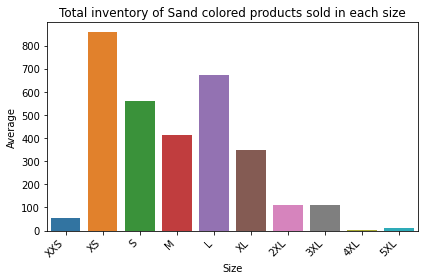

In [44]:
sand_products_means_quantity = products_df['Sand'].mean()

ax = sns.barplot(x=sizes, y=sand_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Total inventory of Sand colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()  


### Describe anything you find in the data after each visualization.

This distribution falls the closest to what we'd expect to see. Majority of products fall within the XS-XL range with some outliers within the XXS, 2XL, 3XL, 4XL, & 5XL sizes. 


### What data visualization helped you understand about data distribution.

This is a normal and expected distribution when considering iventory across product sizes.

## Plotting the average number of Soot colored products sold in each size across all categories.

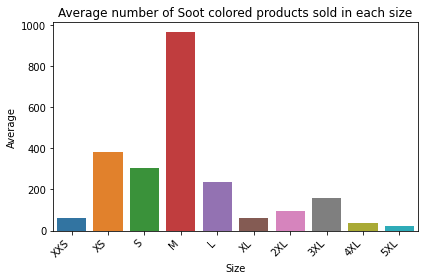

In [45]:
soot_products_means_quantity = products_df['Soot'].mean()

ax = sns.barplot(x=sizes, y=soot_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Soot colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.
 
Again we see a more normal distribution. A very high concentration of products sold in Soot were size medium. No other size comes close to the average number sold. 

### What data visualization helped you understand about data distribution.

The company should evaluate overstocking for Medium in Soot seeing as the high product sold. 

## Plotting the average number of Mica colored products sold in each size across all categories.

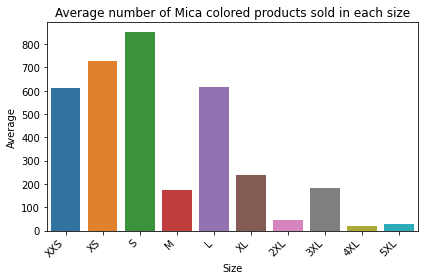

In [46]:
mica_products_means_quantity = products_df['Mica'].mean()

ax = sns.barplot(x=sizes, y=mica_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Mica colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

There is a continued trend within this data of sizes being skewed toward the left. XXS is an extended size and is continuously being sold at very high rates wheras the extended sizes on the right (2XL, 3XL, 4XL, 5XL) are continuously underselling.  

### What data visualization helped you understand about data distribution.

The inventory is not as evenly distributed across standard sizes as would be expected. This should warrant further analysis and exploration to find the causality.

## Plotting the average number of Clay colored products sold in each size across all categories.

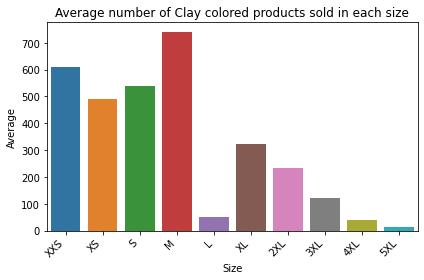

In [47]:
clay_products_means_quantity = products_df['Clay'].mean()

ax = sns.barplot(x=sizes, y=clay_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Clay colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

The high inventory of two sizes and relatively low inventory of the remaining sizes indicates, to me, that the products sold in this color need to be restocked except for in the sizes L, 4XL, and 5XL. This is something of concern as L and XXL should be amongst the highest selling sizes, but with L having such available inventory in the products of this color I would want to meet with the client to look at the overall sales in Clay and the size L.

### What data visualization helped you understand about data distribution.

This distribution is unexpected and should be discussed further with the client. It does not appear that many products in the size L are purchased in the Clay color.

## Plotting the average number of Ochre colored products sold in each size across all categories.

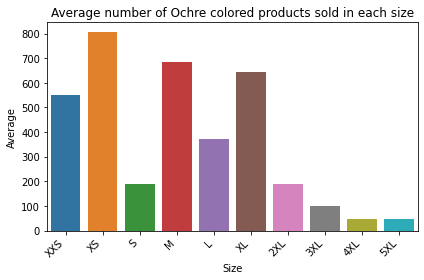

In [48]:
ochre_products_means_quantity = products_df['Ochre'].mean()

ax = sns.barplot(x=sizes, y=ochre_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Ochre colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

The high inventory of size L and low inventory of the remaining sizes indicates, to me, that the products sold in this color need to be restocked except for in the size L. This is something of concern as L should be amongst the highest selling sizes, when looking at the average size of American woman, but with L having such available inventory in the products of this color I would want to meet with the client to look at the overall sales in Ochre and the size L.

### What data visualization helped you understand about data distribution.

This distribution is unexpected and should be discussed further with the client. It does not appear that many products in the size L are purchased in the Ochre color. But it does appear that this is a very popular product amongst extended sizing and could be a good case for a dedicated plus size product or potentially a plus size line.

## Plotting the average number of Sienna colored products sold in each size across all categories.

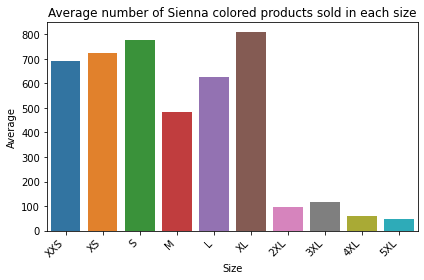

In [49]:
sienna_products_means_quantity = products_df['Sienna'].mean()

ax = sns.barplot(x=sizes, y=sienna_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Sienna colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

I would not expect to see such a steep decline in the average inventory of Sienna colored products on the Skims website for extended sizes of 2XL and up in this color. This is something I would flag for the client as this graph could indicate a restock of standard sizes in this color but also indicate that Skims should consider abbreviating the size range in this color across their products as the low inventory for the extended sizes indicates that the products are not selling quickly. This may be a cost saving opportunity. Additionally I would want to explore the popularity of S sized items sold in Sienna. If this graph depicts inventory after a recent restock then size S seems to be selling really quickly in this color, along with sizes 4XL and 5XL when comparing to the inventory of the other sizes (and colors).


### What data visualization helped you understand about data distribution.

The data is heavily skewed to the left, this indicates to me that this is a very popular color amogst "standard sizes" and justifies higher quantities of inventory/frequent restocks.

## Plotting the average number of Umber colored products sold in each size across all categories.

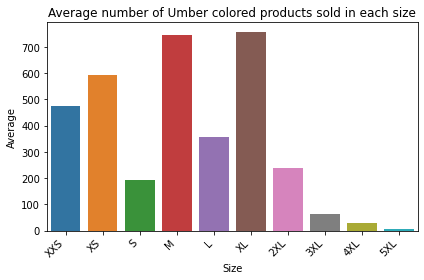

In [50]:
umber_products_means_quantity = products_df['Umber'].mean()

ax = sns.barplot(x=sizes, y=umber_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Umber colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

I would expect standard sizes to have the highest inventory which can be seen in this graph. I would confirm with the client that this is the expected distribution and this is not the inventory after the products have been live on the website for weeks but I would expect companies to carry higher quantities of products in the standard size range. 

### What data visualization helped you understand about data distribution.

There is a relatively normal distribution displayed within this graph. I would want to explore the inventory of size L Umber colored products.

## Plotting the average number of Oxide colored products sold in each size across all categories.

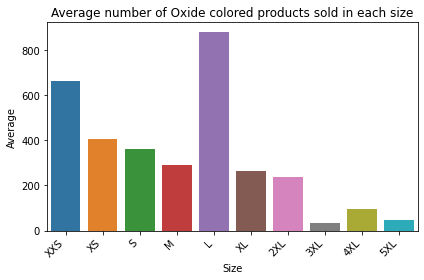

In [51]:
oxide_products_means_quantity = products_df['Oxide'].mean()

ax = sns.barplot(x=sizes, y=oxide_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Oxide colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

There continues to be a trned of the smaller sizes outselling. This particular visualization has L being the top performer for the Oxide color. There is continued slow movement within the larger extended sizes

### What data visualization helped you understand about data distribution.

This distribution indicates that we need smaller supply of Oxide in 3XL-5XL

## Plotting the average number of Cocoa colored products sold in each size across all categories.

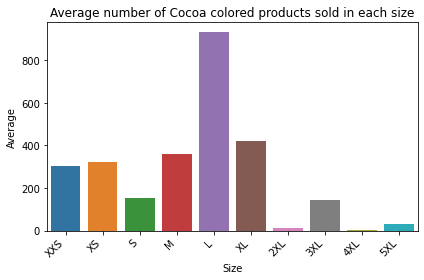

In [52]:
cocoa_products_means_quantity = products_df['Cocoa'].mean()

ax = sns.barplot(x=sizes, y=cocoa_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Cocoa colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

There continues to be a trned of the smaller sizes outselling. This particular visualization has L being the top performer for the Oxide color. There is continued slow movement within the larger extended sizes

### What data visualization helped you understand about data distribution.

This distribution indicates that we need smaller supply of Cocoa in 3XL-5XL

## Plotting the average number of Onyx colored products sold in each size across all categories.

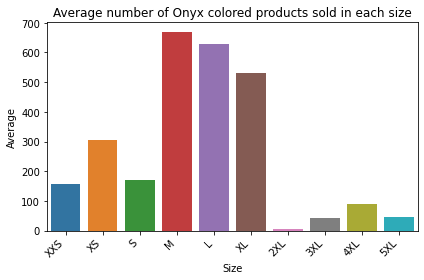

In [53]:
onyx_products_means_quantity = products_df['Onyx'].mean()

ax = sns.barplot(x=sizes, y=onyx_products_means_quantity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title(f'Average number of Onyx colored products sold in each size')
plt.xlabel('Size')
plt.ylabel('Average')
plt.tight_layout()
plt.show()

### Describe anything you find in the data after each visualization.

As the average size of the American woman (Skims' target audience) is between a large and an extra large, the quantities for these sizes does not surprise me. As a retailer I would want to ensure these sizes have the highest inventory as they make up a majority of our sales. I would validate this with restock dates as the low inventory for size 2XL-5XL could indicate that these products are due for restock. I would flag this for the client.

### What data visualization helped you understand about data distribution.

This distribution would suggest that M, L and XL need the highest inventory as they are the best selling sizes amongst Skims products in Onyx.

### What you did about possible outlier as per data distribution visualization.

As noted in the observations above, I would flag any anomolies and discuss with the client (Skims). As there are many explanations for the observed inventory numbers including, restock timing and amounts, popularity of items, sales, etc. I would want to validate that the observations noted above can be explained by one of these reasons and discuss the need to adjust the inventory carried across the various colors and sizes of products sold on the Skims website.

# Creating Simulated Purchases.

Generating Fake Data - We were not able to scrape actual sales data from the Skims site. In lieu of this we simulated sales data. The simulated data pulls in a randomly generated order_date & a quantity purchased. There are built in parameters that the order date must be between 2019 and 2022. The order quantity had paremeters set so that customers could only purchase up to 9 orders at a time.

The second piece of the simulated data was an size and color dictionary. We used the standard sizes & colors available on the skims website within this dictionary.

In [26]:
def generate_fake_dataframe(size, cols, col_names = None, intervals = None, seed = None):
    
    categories_dict = {'size': ['XXS', 'XS', 'S', 'M', 'L', 'XL', '2XL', '3XL', '4XL', '5XL'],
                       'colors' : ['Bone', 'Heather Grey', 'Mineral', 'Kyanite', 'Soot', 'Sand', 'Umber', 'Oxide', 'Cocoa', 'Onyx']
                      }
    default_intervals = {"i" : (0,10), "f" : (0,100), "c" : ("size", 50), "d" : ("2018-12-30","2022-12-31")}
    rng = np.random.default_rng(seed)

    first_c = default_intervals["c"][0]
    categories_names = cycle([first_c] + [c for c in categories_dict.keys() if c != first_c])
    default_intervals["c"] = (categories_names, default_intervals["c"][1])
    
    if isinstance(col_names,list):
        assert len(col_names) == len(cols), f"The fake DataFrame should have {len(cols)} columns but col_names is a list with {len(col_names)} elements"
    elif col_names is None:
        suffix = {"c" : "cat", "i" : "int", "f" : "float", "d" : "date"}
        col_names = [f"column_{str(i)}_{suffix.get(col)}" for i, col in enumerate(cols)]

    if isinstance(intervals,list):
        assert len(intervals) == len(cols), f"The fake DataFrame should have {len(cols)} columns but intervals is a list with {len(intervals)} elements"
    else:
        if isinstance(intervals,dict):
            assert len(set(intervals.keys()) - set(default_intervals.keys())) == 0, f"The intervals parameter has invalid keys"
            default_intervals.update(intervals)
        intervals = [default_intervals[col] for col in cols]
    df = pd.DataFrame()
    for col, col_name, interval in zip(cols, col_names, intervals):
        if interval is None:
            interval = default_intervals[col]
        assert (len(interval) == 2 and isinstance(interval, tuple)) or isinstance(interval, list), f"This interval {interval} is neither a tuple of two elements nor a list of strings."
        if col in ("i","f","d"):
            start, end = interval
        if col == "i":
            df[col_name] = rng.integers(start, end, size)
        elif col == "f":
            df[col_name] = rng.uniform(start, end, size)
        elif col == "c":
            if isinstance(interval, list):
                categories = np.array(interval)
            else:
                cat_family, length = interval
                if isinstance(cat_family, cycle):
                    cat_family = next(cat_family)
                assert cat_family in categories_dict.keys(), f"There are no samples for category '{cat_family}'. Consider passing a list of samples or use one of the available categories: {categories_dict.keys()}"
                categories = rng.choice(categories_dict[cat_family], length, replace = True, shuffle = True)
            df[col_name] = rng.choice(categories, size, shuffle = True)
        elif col == "d":
            df[col_name] = rng.choice(pd.date_range(start, end), size)
    return df    

Something to note in the below data frame. Purchase dates start in 2019. Skims was founded in 2019 so to stay true to the company history the purchase orders are within the time frame that the company has existed.

In [27]:
df = generate_fake_dataframe(
  size = 1000, 
  cols = "ccid", 
  col_names=["size","colors", "quantity", "purchase_date"],
  intervals = {"f" : (0, 100), "d" : ("2019-01-01","2022-11-09")},
  seed=42)

df

,size,colors,quantity,purchase_date
0,4XL,Sand,9,2020-05-29
1,XXS,Sand,6,2019-07-04
2,4XL,Bone,1,2019-01-21
3,5XL,Oxide,1,2020-09-10
4,3XL,Kyanite,8,2021-09-14
...,...,...,...,...
995,2XL,Umber,7,2021-02-09
996,5XL,Cocoa,1,2021-01-25
997,L,Kyanite,3,2019-07-26
998,XL,Onyx,1,2022-01-23


## Create an ID field for the simulated orders dataframe.


In [28]:
df['id'] = np.random.randint(1,10, df.shape[0])

df

,size,colors,quantity,purchase_date,id
0,4XL,Sand,9,2020-05-29,8
1,XXS,Sand,6,2019-07-04,4
2,4XL,Bone,1,2019-01-21,8
3,5XL,Oxide,1,2020-09-10,7
4,3XL,Kyanite,8,2021-09-14,1
...,...,...,...,...,...
995,2XL,Umber,7,2021-02-09,5
996,5XL,Cocoa,1,2021-01-25,3
997,L,Kyanite,3,2019-07-26,4
998,XL,Onyx,1,2022-01-23,6


## Only keep title, category and price columns of products_df.

For this piece we decided we should only keep the title, price, category for the new dataframe with simulated sales data. The reason for this is to still maintain the scraped data of title and category, price pairings. This is an important piece for the next steps of this project.

In [29]:
df2 = products_df[['title', 'category', 'price']]

df2

,title,category,price
,,,
1,FITS EVERYBODY T-SHIRT BRA,bra,51
5,FITS EVERYBODY UNLINED UNDERWIRE BRA,bra,51
7,NAKED PLUNGE BRA,bra,51
8,NAKED PLUNGE TANK BRA,bra,50
9,NAKED SCOOP BRA,bra,45
...,...,...,...
257,SHEER SCULPT HIGH WAIST THONG,shapewear,63
259,SHINE SHAPEWEAR BODYSUIT BRIEF W/ SNAPS,shapewear,55
260,SHINE SHAPEWEAR LEGGING,shapewear,53


We created an ID field so that we have a field to join the simulated data with our current data frame of product title, category, and price.

In [30]:
df2['id'] = np.random.randint(1,10, df2.shape[0])

df2

/var/folders/pd/tqnxbq35669gpccpkc00dc540000gn/T/ipykernel_4829/4254798843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['id'] = np.random.randint(1,10, df2.shape[0])


,title,category,price,id
,,,,
1,FITS EVERYBODY T-SHIRT BRA,bra,51,1
5,FITS EVERYBODY UNLINED UNDERWIRE BRA,bra,51,1
7,NAKED PLUNGE BRA,bra,51,6
8,NAKED PLUNGE TANK BRA,bra,50,4
9,NAKED SCOOP BRA,bra,45,4
...,...,...,...,...
257,SHEER SCULPT HIGH WAIST THONG,shapewear,63,2
259,SHINE SHAPEWEAR BODYSUIT BRIEF W/ SNAPS,shapewear,55,5
260,SHINE SHAPEWEAR LEGGING,shapewear,53,9


## Merge df2 (products_df) with df (simulated data).

The dataframes were merged together using the ID field that we added to both.

In [31]:
df_fin = pd.merge(df, df2, on='id', how='inner')

df_fin

/var/folders/pd/tqnxbq35669gpccpkc00dc540000gn/T/ipykernel_4829/198280254.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_fin = pd.merge(df, df2, on='id', how='inner')


,size,colors,quantity,purchase_date,id,"(title, )","(category, )","(price, )"
0,4XL,Sand,9,2020-05-29,8,COTTON JERSEY T-STRING THONG,underwear,44
1,4XL,Sand,9,2020-05-29,8,SOFT LOUNGE LONG SLEEVE DRESS,loungewear,97
2,4XL,Sand,9,2020-05-29,8,SOFT LOUNGE SLEEP SET,loungewear,48
3,4XL,Sand,9,2020-05-29,8,SCULPTING SHORT MID THIGH W/ OPEN GUSSET,shapewear,80
4,4XL,Sand,9,2020-05-29,8,SCULPTING THONG HIGH WAIST,shapewear,69
...,...,...,...,...,...,...,...,...
7785,4XL,Kyanite,2,2020-09-18,2,SOFT LOUNGE MINI DRESS,loungewear,55
7786,4XL,Kyanite,2,2020-09-18,2,BARELY THERE HIGH WAIST THONG,shapewear,48
7787,4XL,Kyanite,2,2020-09-18,2,SCULPTING THONG BODYSUIT,shapewear,76
7788,4XL,Kyanite,2,2020-09-18,2,SHEER SCULPT HIGH WAIST THONG,shapewear,63


### Run a string strip and lower so that all of our column headers are as they should be.

In [32]:
df_fin.columns = df_fin.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_fin

/var/folders/pd/tqnxbq35669gpccpkc00dc540000gn/T/ipykernel_4829/2881931693.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_fin.columns = df_fin.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/pd/tqnxbq35669gpccpkc00dc540000gn/T/ipykernel_4829/2881931693.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_fin.columns = df_fin.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


,size,colors,quantity,purchase_date,id,NaN,NaN,NaN
0,4XL,Sand,9,2020-05-29,8,COTTON JERSEY T-STRING THONG,underwear,44
1,4XL,Sand,9,2020-05-29,8,SOFT LOUNGE LONG SLEEVE DRESS,loungewear,97
2,4XL,Sand,9,2020-05-29,8,SOFT LOUNGE SLEEP SET,loungewear,48
3,4XL,Sand,9,2020-05-29,8,SCULPTING SHORT MID THIGH W/ OPEN GUSSET,shapewear,80
4,4XL,Sand,9,2020-05-29,8,SCULPTING THONG HIGH WAIST,shapewear,69
...,...,...,...,...,...,...,...,...
7785,4XL,Kyanite,2,2020-09-18,2,SOFT LOUNGE MINI DRESS,loungewear,55
7786,4XL,Kyanite,2,2020-09-18,2,BARELY THERE HIGH WAIST THONG,shapewear,48
7787,4XL,Kyanite,2,2020-09-18,2,SCULPTING THONG BODYSUIT,shapewear,76
7788,4XL,Kyanite,2,2020-09-18,2,SHEER SCULPT HIGH WAIST THONG,shapewear,63


If column names are coming in wonky run the code below.

In [34]:
df_fin.columns.values[-1] = "price"
df_fin.columns.values[-2] = "category"
df_fin.columns.values[-3] = "title"

Let's see what the column names look like now.

In [35]:
for col in df_fin.columns:
    print(col)

size
colors
quantity
purchase_date
id
title
category
price


## Now that we have our dataframe df_fin we need to look at the data types.

In [79]:
df_fin.dtypes

size                     object
colors                   object
quantity                  int64
purchase_date    datetime64[ns]
id                        int64
title                    object
category                 object
price                     int64
dtype: object

If the purchase date is not in the format datetime64 run the code below

In [64]:
#df_fin['purchase_date'] = pd.to_datetime(df_fin['purchase_date'])
#df_fin
#df_fin.dtypes

## In order to do analysis via month and year we will add a month and year column to our data frame.

It was important for us to verify that the purchase_date column was the datetime type so that we can extract the year and month by accessing the dataframes index. 

We know that months come in as an interger 1-12. We map those integer representation to gather the name within the months list. The last step of this block is changing the data type of our month field to categories. This is beneficial because it will maintain the order in the months list allowing us to to properly sort through the months.

In [36]:
df_fin.sort_values(by="purchase_date", inplace=False)


,size,colors,quantity,purchase_date,id,title,category,price
4035,XL,Onyx,1,2019-01-01,3,CUT OUT RACERBACK BRALETTE,loungewear,65
4032,XL,Onyx,1,2019-01-01,3,NAKED SCOOP TANK BRA,bra,55
4033,XL,Onyx,1,2019-01-01,3,FITS EVERYBODY MICRO THONG ON A WHITE BACKGROUND,underwear,41
4034,XL,Onyx,1,2019-01-01,3,SMOOTH LOUNGE CREW NECK LONG SLEEVE DRESS,clothing,54
4036,XL,Onyx,1,2019-01-01,3,SOFT LOUNGE FOLD OVER SHORT,loungewear,98
...,...,...,...,...,...,...,...,...
5071,XXS,Heather Grey,1,2022-11-08,9,SOFT LOUNGE RACER TANK,loungewear,73
5070,XXS,Heather Grey,1,2022-11-08,9,CUT OUT ONE SHOULDER DRESS,loungewear,89
5069,XXS,Heather Grey,1,2022-11-08,9,SMOOTH LOUNGE OPEN RACERBACK DRESS,clothing,100
1132,S,Bone,9,2022-11-08,4,NAKED SCOOP BRA,bra,45


In [81]:
df_fin.set_index(["purchase_date"], inplace=True)


In [82]:


months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df_fin['year'] = df_fin.index.year
df_fin['month'] = df_fin.index.month
df_fin['month'] = df_fin["month"].apply(lambda x: months[x-1])

df_fin['month'] = pd.Categorical(df_fin["month"], categories=months)


## Creating Total Sales.

In order to view the data by total sales we will create a new column called 'order total' which is a calculation of quantity purchased multiplied by the price. This will give us the total price paid for that order.

In [87]:
df_fin['order total'] = df_fin["quantity"] * df_fin["price"]


## Creating a pivot table.

In [83]:
df_pivot = pd.pivot_table(df_fin, values = 'quantity',
                          index = 'year',
                         columns = 'category',
                         aggfunc = np.sum)

# Data Visualizations of Simulated Order Data.

## Plotting the quantity sold by category over time.

Text(0.5, 1.0, 'Categories ordered by Year')

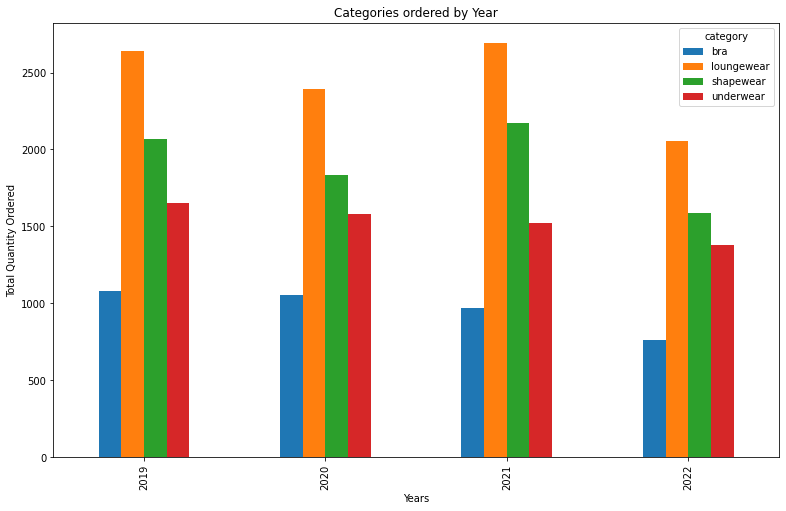

In [84]:
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(13, 8)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Total Quantity Ordered")
ax.set_title("Categories ordered by Year")

### Describe anything you find in the data after each visualization.

*Data will vary each time this project is re-run*

We can note from this bar plot that loungewear is the most popular year after year. Bras are consistently Skims lowest selling product. From an inventory standpoint this could tell Skims that they don't need to keep as much bra inventory on hand

### What data visualization helped you understand about data distribution.¶

This visualization helps us to understand an overall picture of what the data looks like over time. We're able to see how many units skims is selling across the various categories. 

## Plotting the quantity sold by category over time.

Now let's investigate a little closer to see what the orders look like by month.

Text(0.5, 1.0, 'Categories ordered by Month')

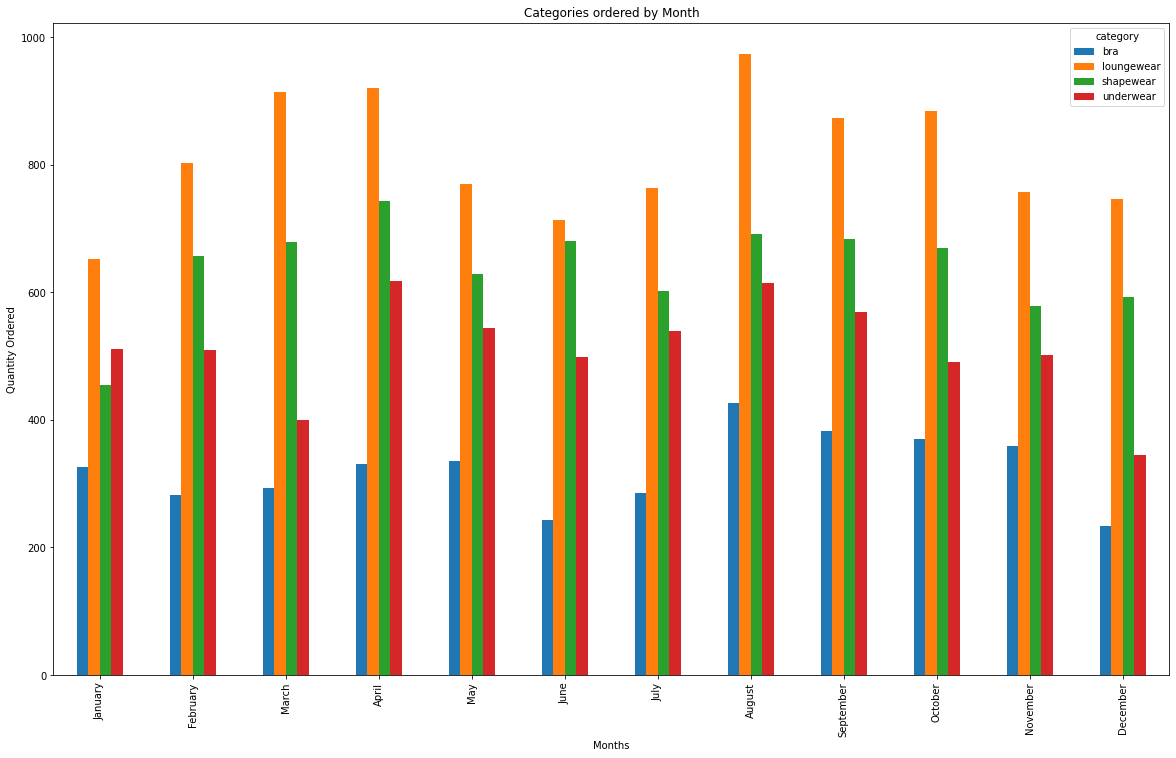

In [85]:
df_pivot2 = pd.pivot_table(df_fin, values = 'quantity',
                          index = 'month',
                         columns = 'category',
                         aggfunc = np.sum)

ax2 = df_pivot2.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig2 = ax2.get_figure()

# Change the plot dimensions (width, height)
fig2.set_size_inches(20, 12)

# Change the axes labels
ax2.set_xlabel("Months")
ax2.set_ylabel("Quantity Ordered")
ax2.set_title("Categories ordered by Month")

### Describe anything you find in the data after each visualization.

*Data will vary each time this project is re-run*

We can note from this bar plot that loungewear is the most popular year after year. Sales for each category is consistent month to month. 
### What data visualization helped you understand about data distribution.¶

This visualization helps us to understand if their is a particular month where we are overselling in a certain category. In this particular bar chart it appears that August is our highest performing month while January is the lowest performing

## Plotting the sales over time.


Text(0.5, 1.0, 'Sales by Year')

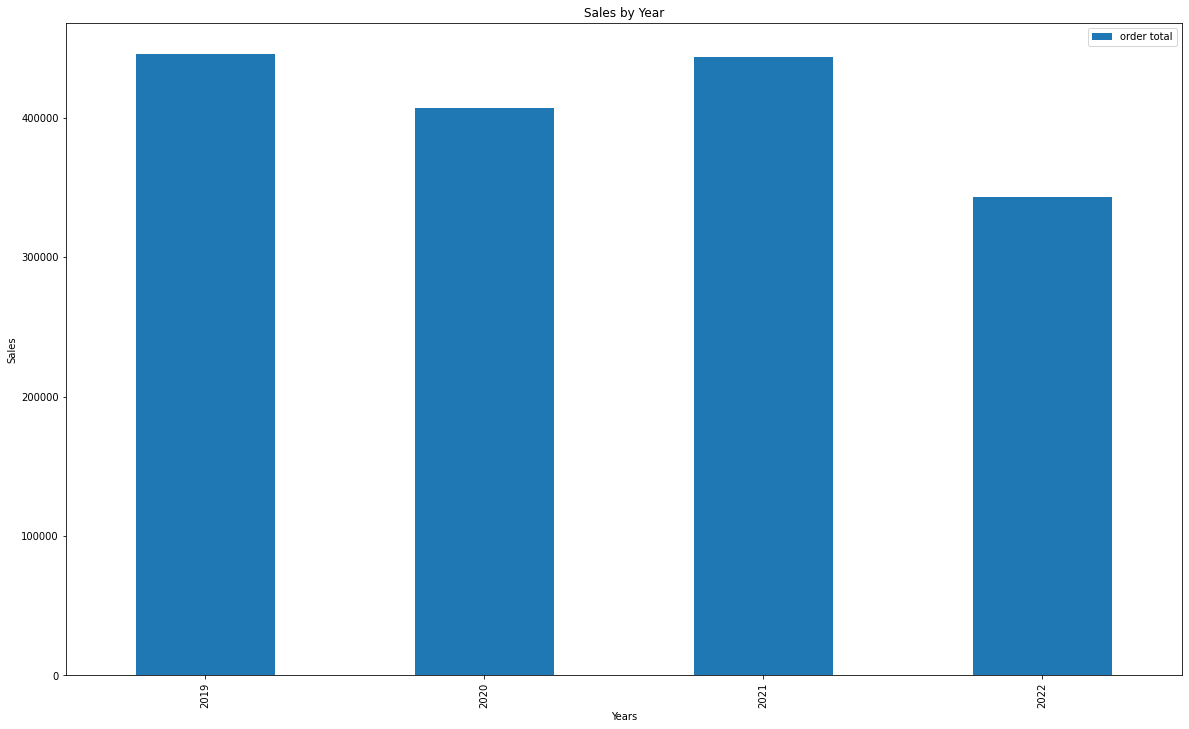

In [89]:
df_pivot4 = pd.pivot_table(df_fin, values = 'order total',
                          index = 'year',
                         aggfunc = np.sum)

ax4 = df_pivot4.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig4 = ax4.get_figure()

# Change the plot dimensions (width, height)
fig4.set_size_inches(20, 12)

# Change the axes labels
ax4.set_xlabel("Years")
ax4.set_ylabel("Sales")
ax4.set_title("Sales by Year")

### Describe anything you find in the data after each visualization.

*Data will vary each time this project is re-run*

This tells us which years had the highest overall sales. When this was run 2019 was the highest sales. This coincides with the founding of the company. We can hypothesize that their was initial popularity due to the newness of the brand which has slightly slowed down over the years

### What data visualization helped you understand about data distribution.¶

This visualization helps us to understand overall sales from a wide lens. We don't see a downward trend in terms of sales which is very encouraging. 

## Plotting the sales by category over time.



Text(0.5, 1.0, 'Sales ordered by Year')

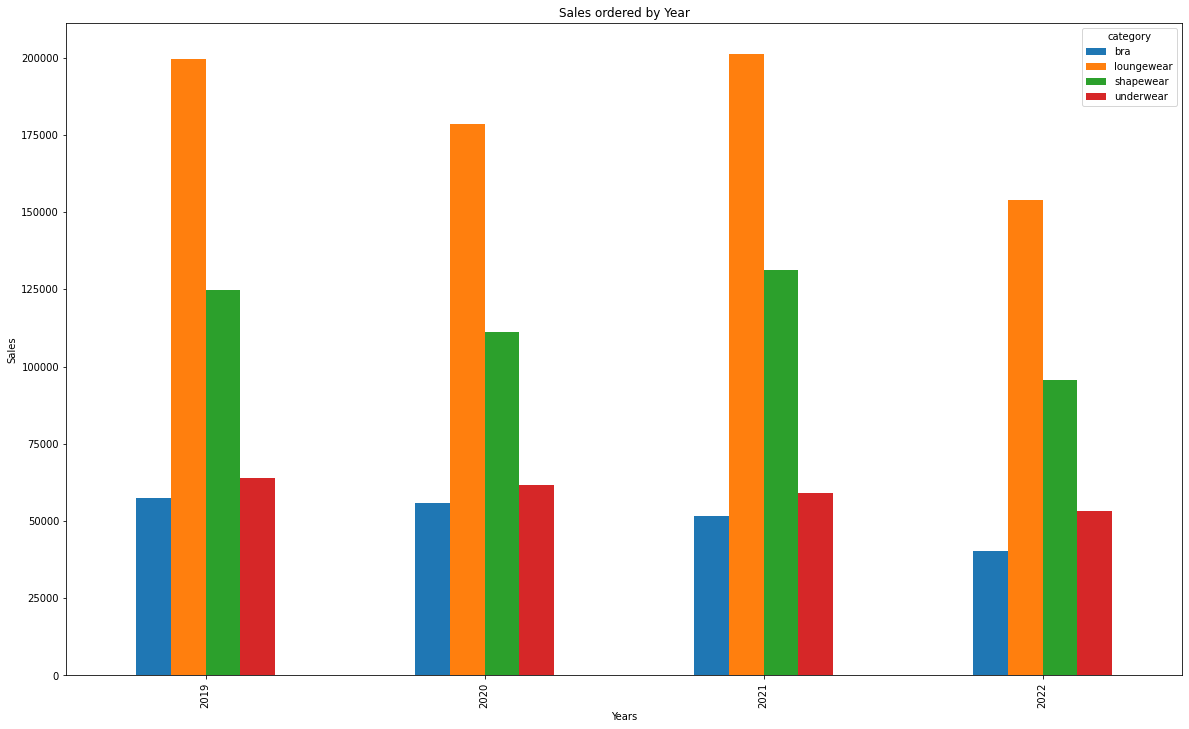

In [90]:
df_pivot3 = pd.pivot_table(df_fin, values = 'order total',
                          index = 'year',
                         columns = 'category',
                         aggfunc = np.sum)

ax3 = df_pivot3.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig3 = ax3.get_figure()

# Change the plot dimensions (width, height)
fig3.set_size_inches(20, 12)

# Change the axes labels
ax3.set_xlabel("Years")
ax3.set_ylabel("Sales")
ax3.set_title("Sales ordered by Year")

### Describe anything you find in the data after each visualization.

*Data will vary each time this project is re-run*

As expected the item with the highest quantity sold is bringing in the highest amount of sales.

### What data visualization helped you understand about data distribution.¶

This visualization helps us to understand that the sales matches the quantity sold. As we saw in the previous chart Loungewear is by far Skim's most popular product line. Outpacing the other categories by a significant amount.

### Let's take a closer look at the loungewear category.

In [91]:
cat_lounge = df_fin[df_fin.category == 'loungewear']

#### Quantity Sold by Size

Text(0.5, 1.0, 'Quantity sold by Size')

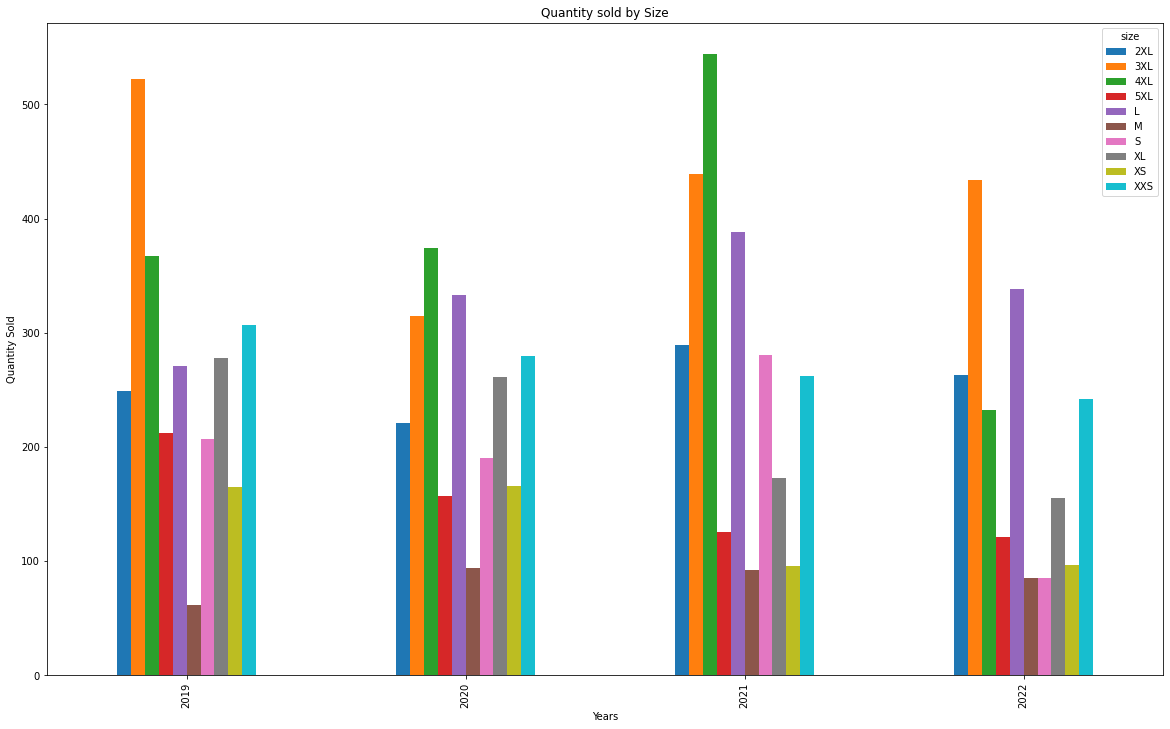

In [92]:
df_pivot5 = pd.pivot_table(cat_lounge, values = 'quantity',
                          index = 'year',
                        columns = 'size',
                         aggfunc = np.sum)

ax5 = df_pivot5.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig5 = ax5.get_figure()

# Change the plot dimensions (width, height)
fig5.set_size_inches(20, 12)

# Change the axes labels
ax5.set_xlabel("Years")
ax5.set_ylabel("Quantity Sold")
ax5.set_title("Quantity sold by Size")

### Describe anything you find in the data after each visualization.

*Data will vary each time this project is re-run*

3XL & 4XL are the fastest moving sizes in the lounge category. This goes against the findings previously but this plot uses simulated sales data that is seperate from the previous analysis.

### What data visualization helped you understand about data distribution.¶

This visualization gives us insight into which sizes we should ensure we have in inventory. We will want to have the highest selling sizes in inventory knowing the popularity is there. 

#### Quantity Sold by Color

Text(0.5, 1.0, 'Quantity sold by Color')

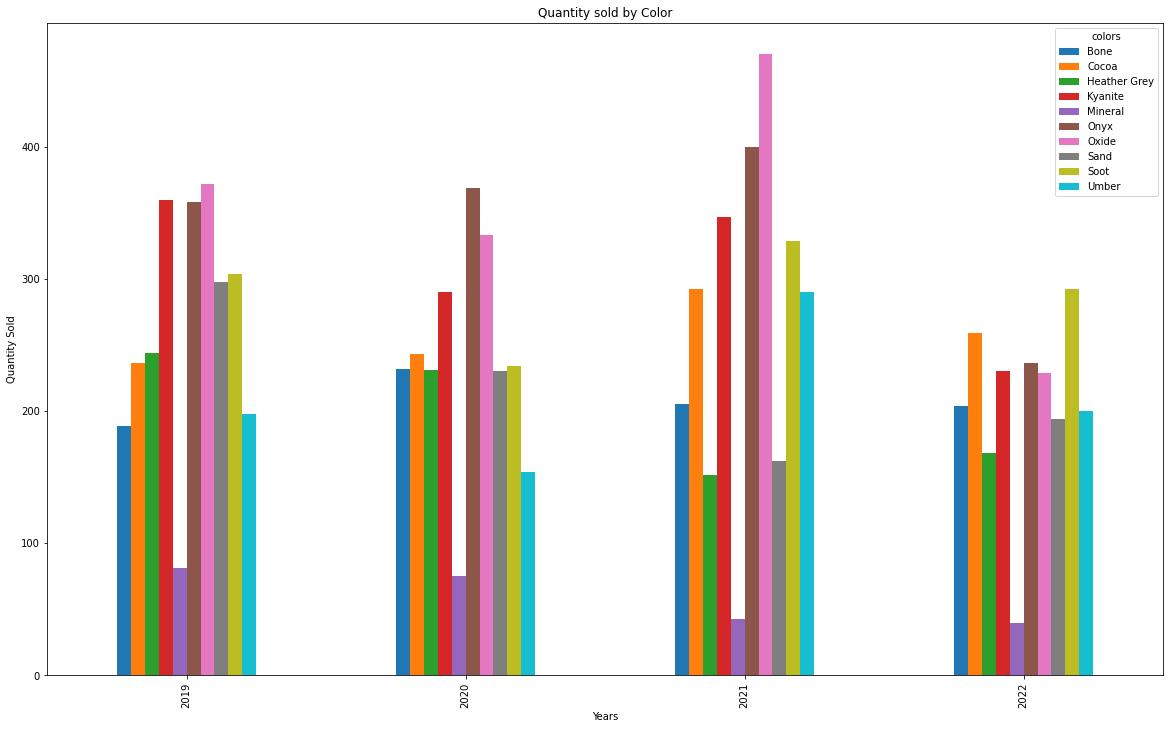

In [93]:
df_pivot6 = pd.pivot_table(cat_lounge, values = 'quantity',
                          index = 'year',
                        columns = 'colors',
                         aggfunc = np.sum)

ax6 = df_pivot6.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig6 = ax6.get_figure()

# Change the plot dimensions (width, height)
fig6.set_size_inches(20, 12)

# Change the axes labels
ax6.set_xlabel("Years")
ax6.set_ylabel("Quantity Sold")
ax6.set_title("Quantity sold by Color")

### Describe anything you find in the data after each visualization.

*Data will vary each time this project is re-run*

This is the first bar chart where the results have varied significantly by year. 

### What data visualization helped you understand about data distribution.¶

Overall this bar chart shows us that Oxide, Onyx, and Kyanite are consistently high selling, although in some years they are not the highest seller. Mineral is consistently the lowest selling color meaning that we might consider stocking less of it or discontinuing this color. 

# Conclusion:

In conclusion, we were able to explore inventory and purchase trends of products sold on the Skims website. This simulated project allowed us to test the common industry assumptions against customer and transactional data. These methods can be applied to real world data (purchases) to gather further insights into the popularity of various items, sizes, and colors of Skims products. This information can help influence future investments into product development so the company can see the highest return on investment in these new products. Additionally from the customer's perspective, there is a great opportunity to improve the shopping experience to allow more customers to purchase the items of interest to them before they sell out. This can be accomplished through a notification service. 

## Future Considerations:

In the next phase of this analysis it would be helfpul to connect the purchase orders with the products_df inventory dataframe. In doing so we could update the inventory numbers in real-time as new purchases come through. That would allow us to indentify and flag the most popular items, using a threshold of ~10 or less items remaining for example to trigger this "flag". We could use this data to inform customers, through an opt-in service (by providing their email address), that items they have elected to "watch" are selling out fast. We could make the model more mature by allowing the customer to provide their product, size, and color preferences when opting into this service. This would allow customers to shop more efficiently and purchase the items that are of most interest to them before they sell out. This service could also be coupled with a restock notification when their items of interest have an inventory restock in their prefered color and size.

On the vendor side, this would helpful information to gather as they would have a better sense of their most popular products, colors, and sizes. They can use this information when making restock purchase orders so they carry inventory in the right quantities for their most popular items, colors, and sizes. This would reduce unneccessary overhead and overordering of unpopular products in the future.